<a href="https://colab.research.google.com/github/Shrinithi04/Linear-regression-model-for-forecasting-time-series-data/blob/main/TSA_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.random.seed(42)
n = 100
time = np.arange(n)
data = 50 + 0.5 * time + np.random.normal(scale=5, size=n)

In [ ]:
df = pd.DataFrame({'time': time, 'value': data})

In [ ]:
def create_lag_features(df, lags=5):
    df = df.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    df['rolling_mean'] = df['value'].rolling(window=3).mean().shift(1)
    return df.dropna()

df_lagged = create_lag_features(df, lags=5)

In [ ]:
X = df_lagged.drop(columns=['value']).values
y = df_lagged['value'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
alpha_values = [0.01, 0.1, 1, 10, 100]
best_mae = float("inf")
best_alpha = None
best_model = None

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Ridge (alpha={alpha}) → MAE: {mae:.2f}")

    if mae < best_mae:
        best_mae = mae
        best_alpha = alpha
        best_model = model

Ridge (alpha=0.01) → MAE: 2.73
Ridge (alpha=0.1) → MAE: 2.72
Ridge (alpha=1) → MAE: 2.80
Ridge (alpha=10) → MAE: 3.14
Ridge (alpha=100) → MAE: 5.11


In [ ]:
y_best_pred = best_model.predict(X_test)

In [ ]:
best_rmse = np.sqrt(mean_squared_error(y_test, y_best_pred))

In [ ]:
print(f"\nBest Alpha: {best_alpha}")
print(f"Best Ridge Regression MAE: {best_mae:.2f}")
print(f"Best Ridge Regression RMSE: {best_rmse:.2f}")


Best Alpha: 0.1
Best Ridge Regression MAE: 2.72
Best Ridge Regression RMSE: 3.45


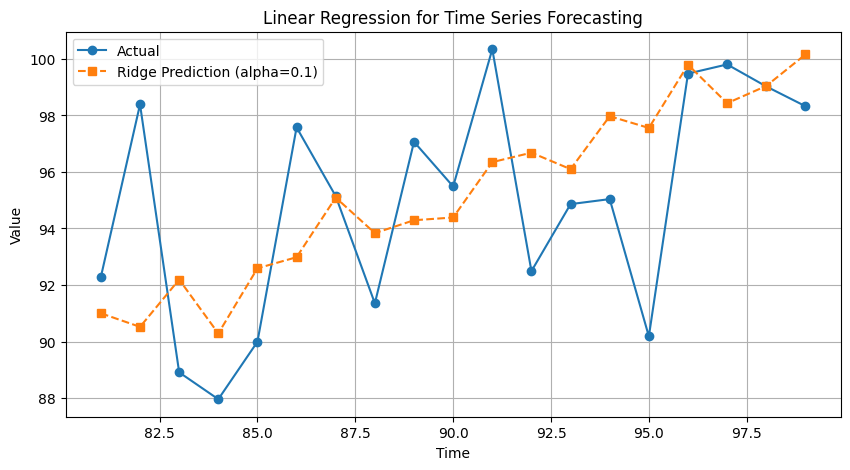

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(time[len(time) - len(y_test):], y_test, label="Actual", marker='o')
plt.plot(time[len(time) - len(y_test):], y_best_pred, label=f"Ridge Prediction (alpha={best_alpha})", marker='s', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Linear Regression for Time Series Forecasting")
plt.legend()
plt.grid()
plt.show()